In [20]:
import numpy as np
import cantera as ct
import pandas as pd 
import os
import sys
import time
import itertools
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import glob
import seaborn as sns

In [13]:
data_d0 = pd.read_csv("/work/kotlarcm/WORK/Automated_Reduced/1D/Detailed/1D_PMX_ER1.0_T300.0_P1.0.csv")
data_r0= pd.read_csv("/work/kotlarcm/WORK/Automated_Reduced/1D/Reduced/1D_PMX_ER1.0_T300.0_P1.0.csv")
species = [col for col in data_r0.columns if col.startswith("Y_")]
print(species)

['Y_AR', 'Y_N2', 'Y_H2', 'Y_H', 'Y_O2', 'Y_O', 'Y_H2O', 'Y_OH', 'Y_HO2', 'Y_NO', 'Y_NH3', 'Y_NH2', 'Y_NH', 'Y_N', 'Y_NNH', 'Y_N2H2', 'Y_HNO', 'Y_NO2', 'Y_N2O']


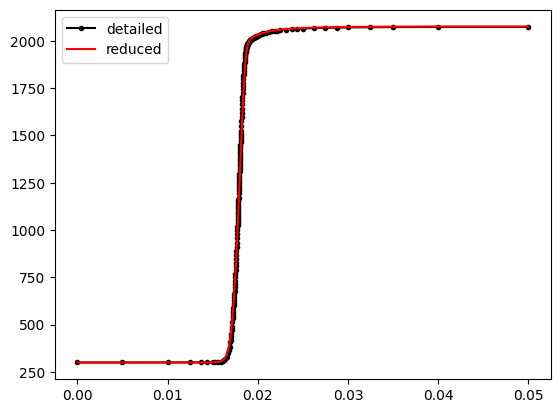

In [11]:
plt.plot(data_d0["grid"],data_d0["T"],'k.-', label='detailed')
plt.plot(data_r0["grid"],data_r0["T"],'r', label='reduced')
plt.legend()

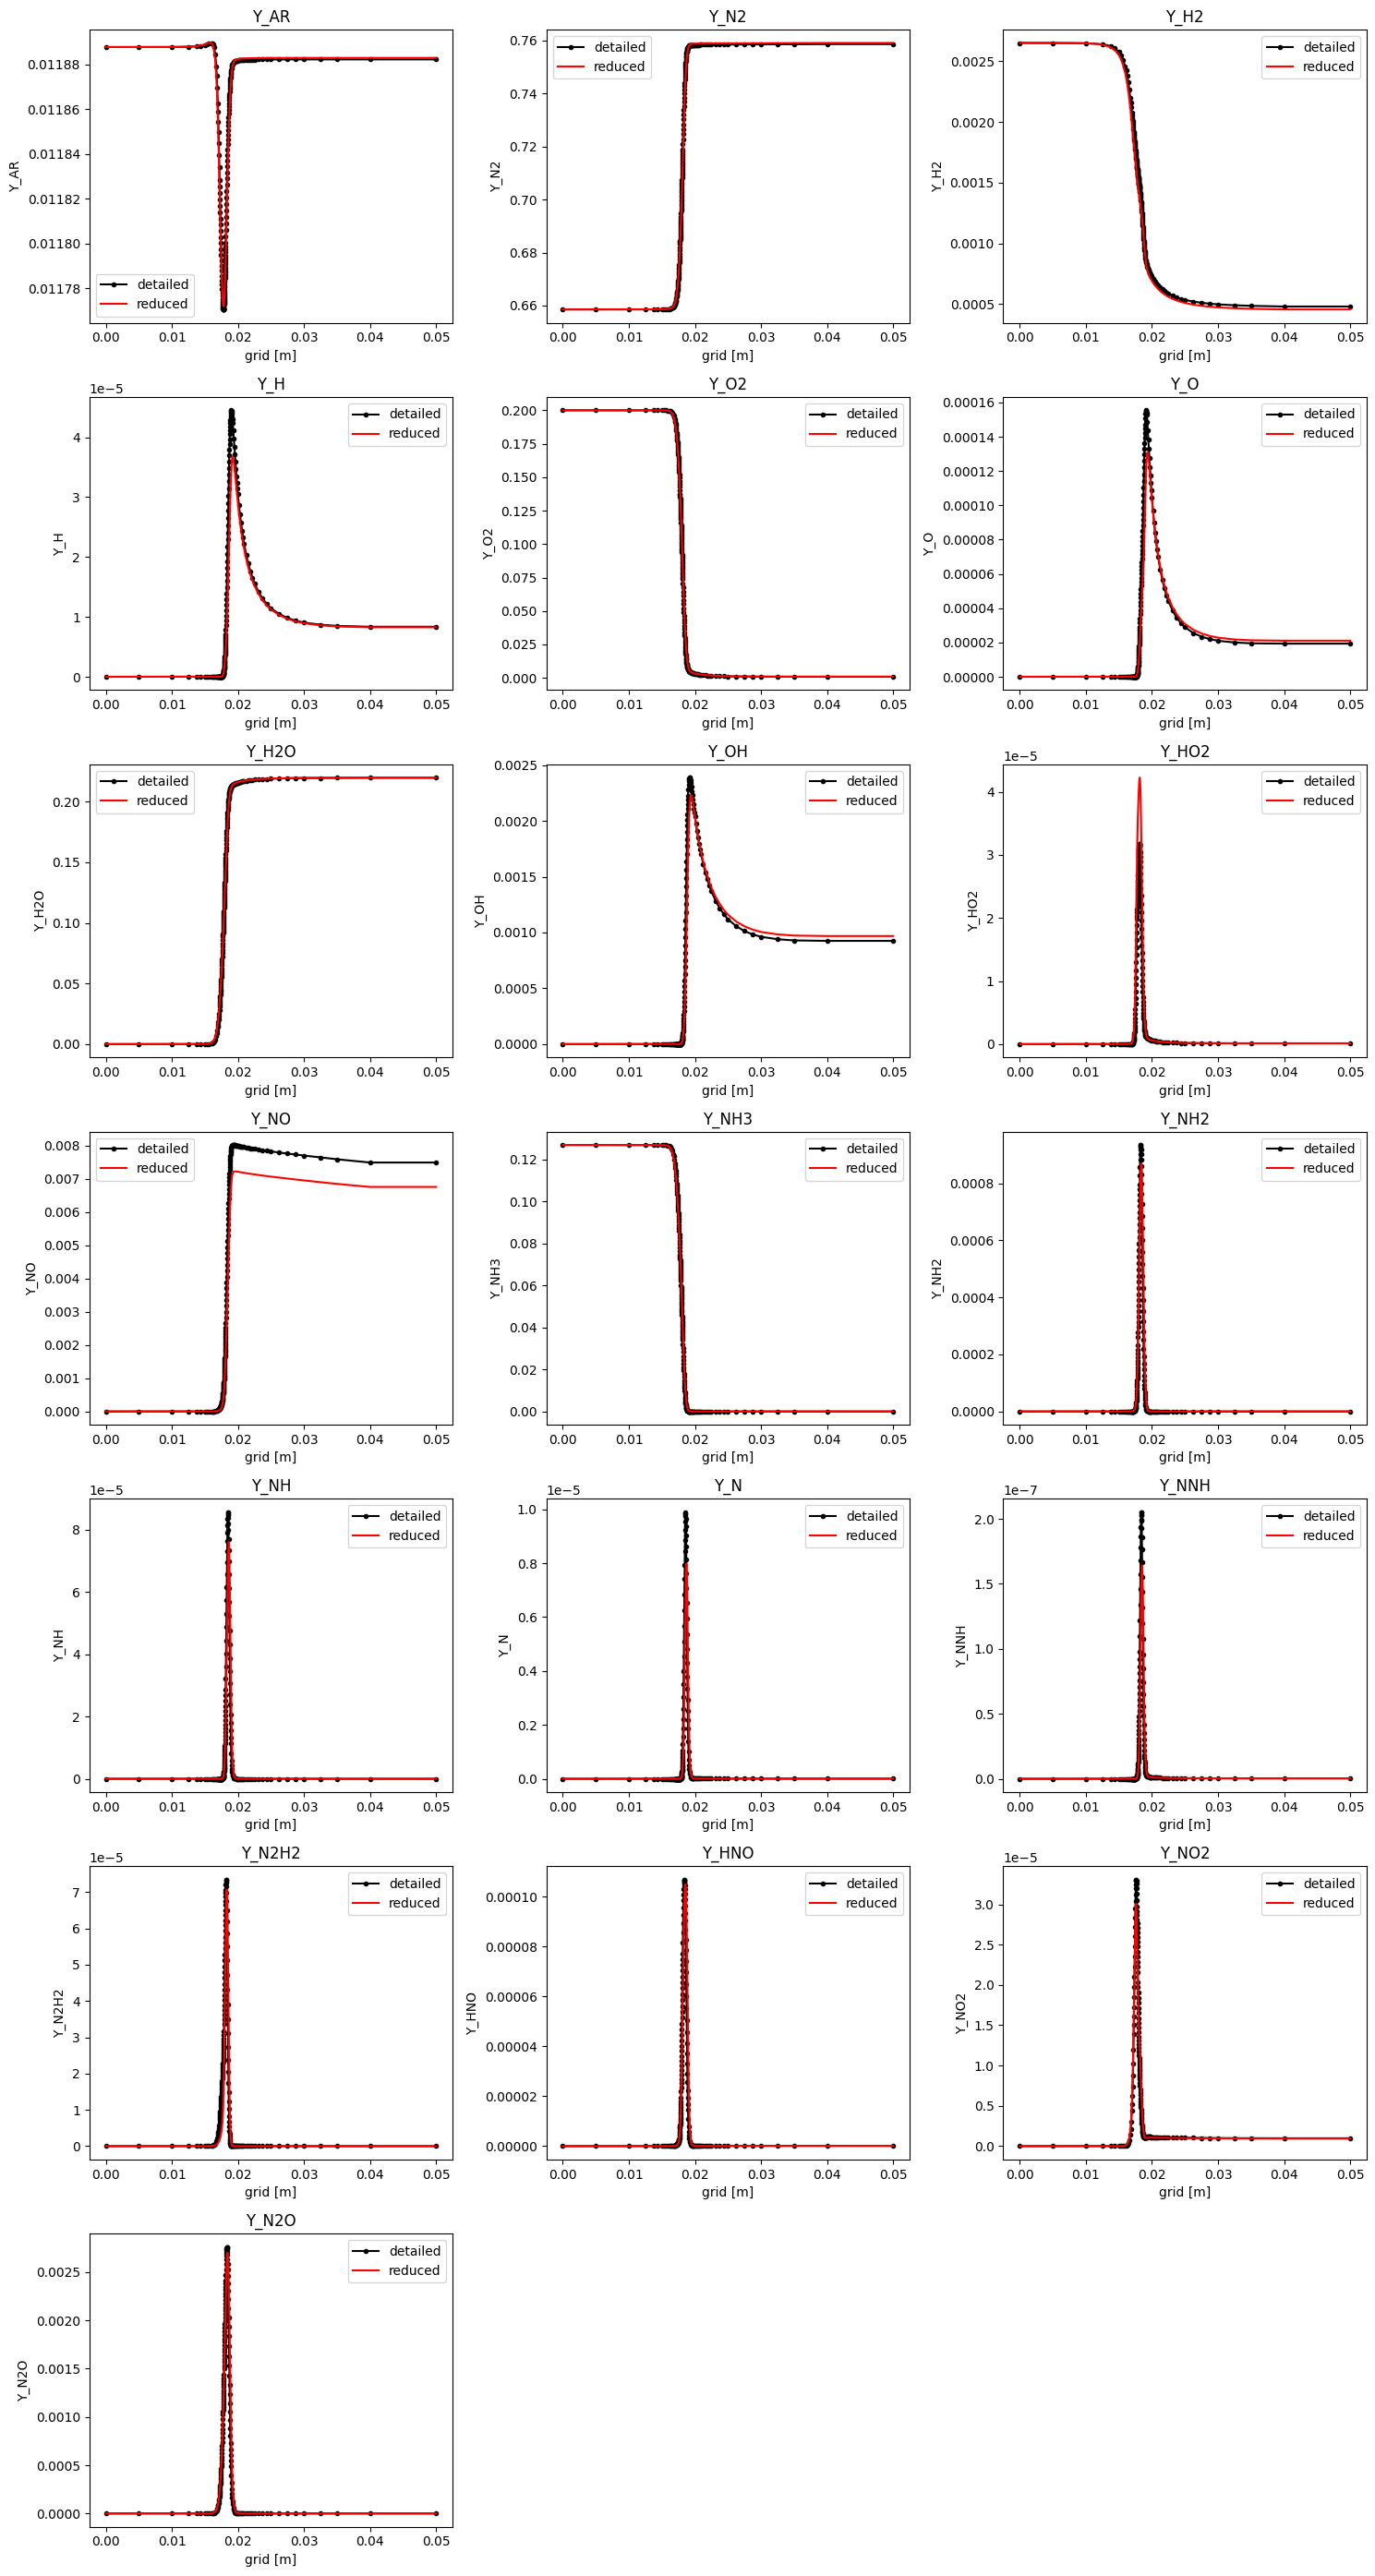

In [7]:
n_species = len(species)
n_cols = 3 # You can adjust number of columns depending on layout preference
n_rows = (n_species + n_cols - 1) // n_cols  # Ceiling division for rows

fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

for i, s in enumerate(species):
    row, col = divmod(i, n_cols)
    ax = axs[row][col]
    ax.plot(data_d0["grid"], data_d0[s], 'k.-', label='detailed')
    ax.plot(data_r0["grid"], data_r0[s], 'r', label='reduced')
    ax.set_xlabel("grid [m]")
    ax.set_ylabel(s)
    ax.legend()
    ax.set_title(s)

# Hide any unused subplots
for i in range(n_species, n_rows * n_cols):
    row, col = divmod(i, n_cols)
    fig.delaxes(axs[row][col])

plt.tight_layout()
plt.savefig("Species_1D.png")
plt.show()


In [4]:
data_d = pd.read_csv('/work/kotlarcm/WORK/Automated_Reduced/1D/Processing_Detailed.csv')
data_r = pd.read_csv("/work/kotlarcm/WORK/Automated_Reduced/1D/Processing_Reduced.csv")

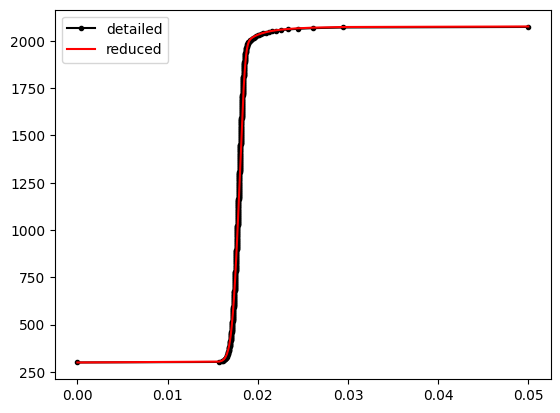

In [5]:
plt.plot(data_d["common_grid"],data_d["T"],'k.-', label='detailed')
plt.plot(data_r["common_grid"],data_r["T"],'r', label='reduced')
plt.legend()

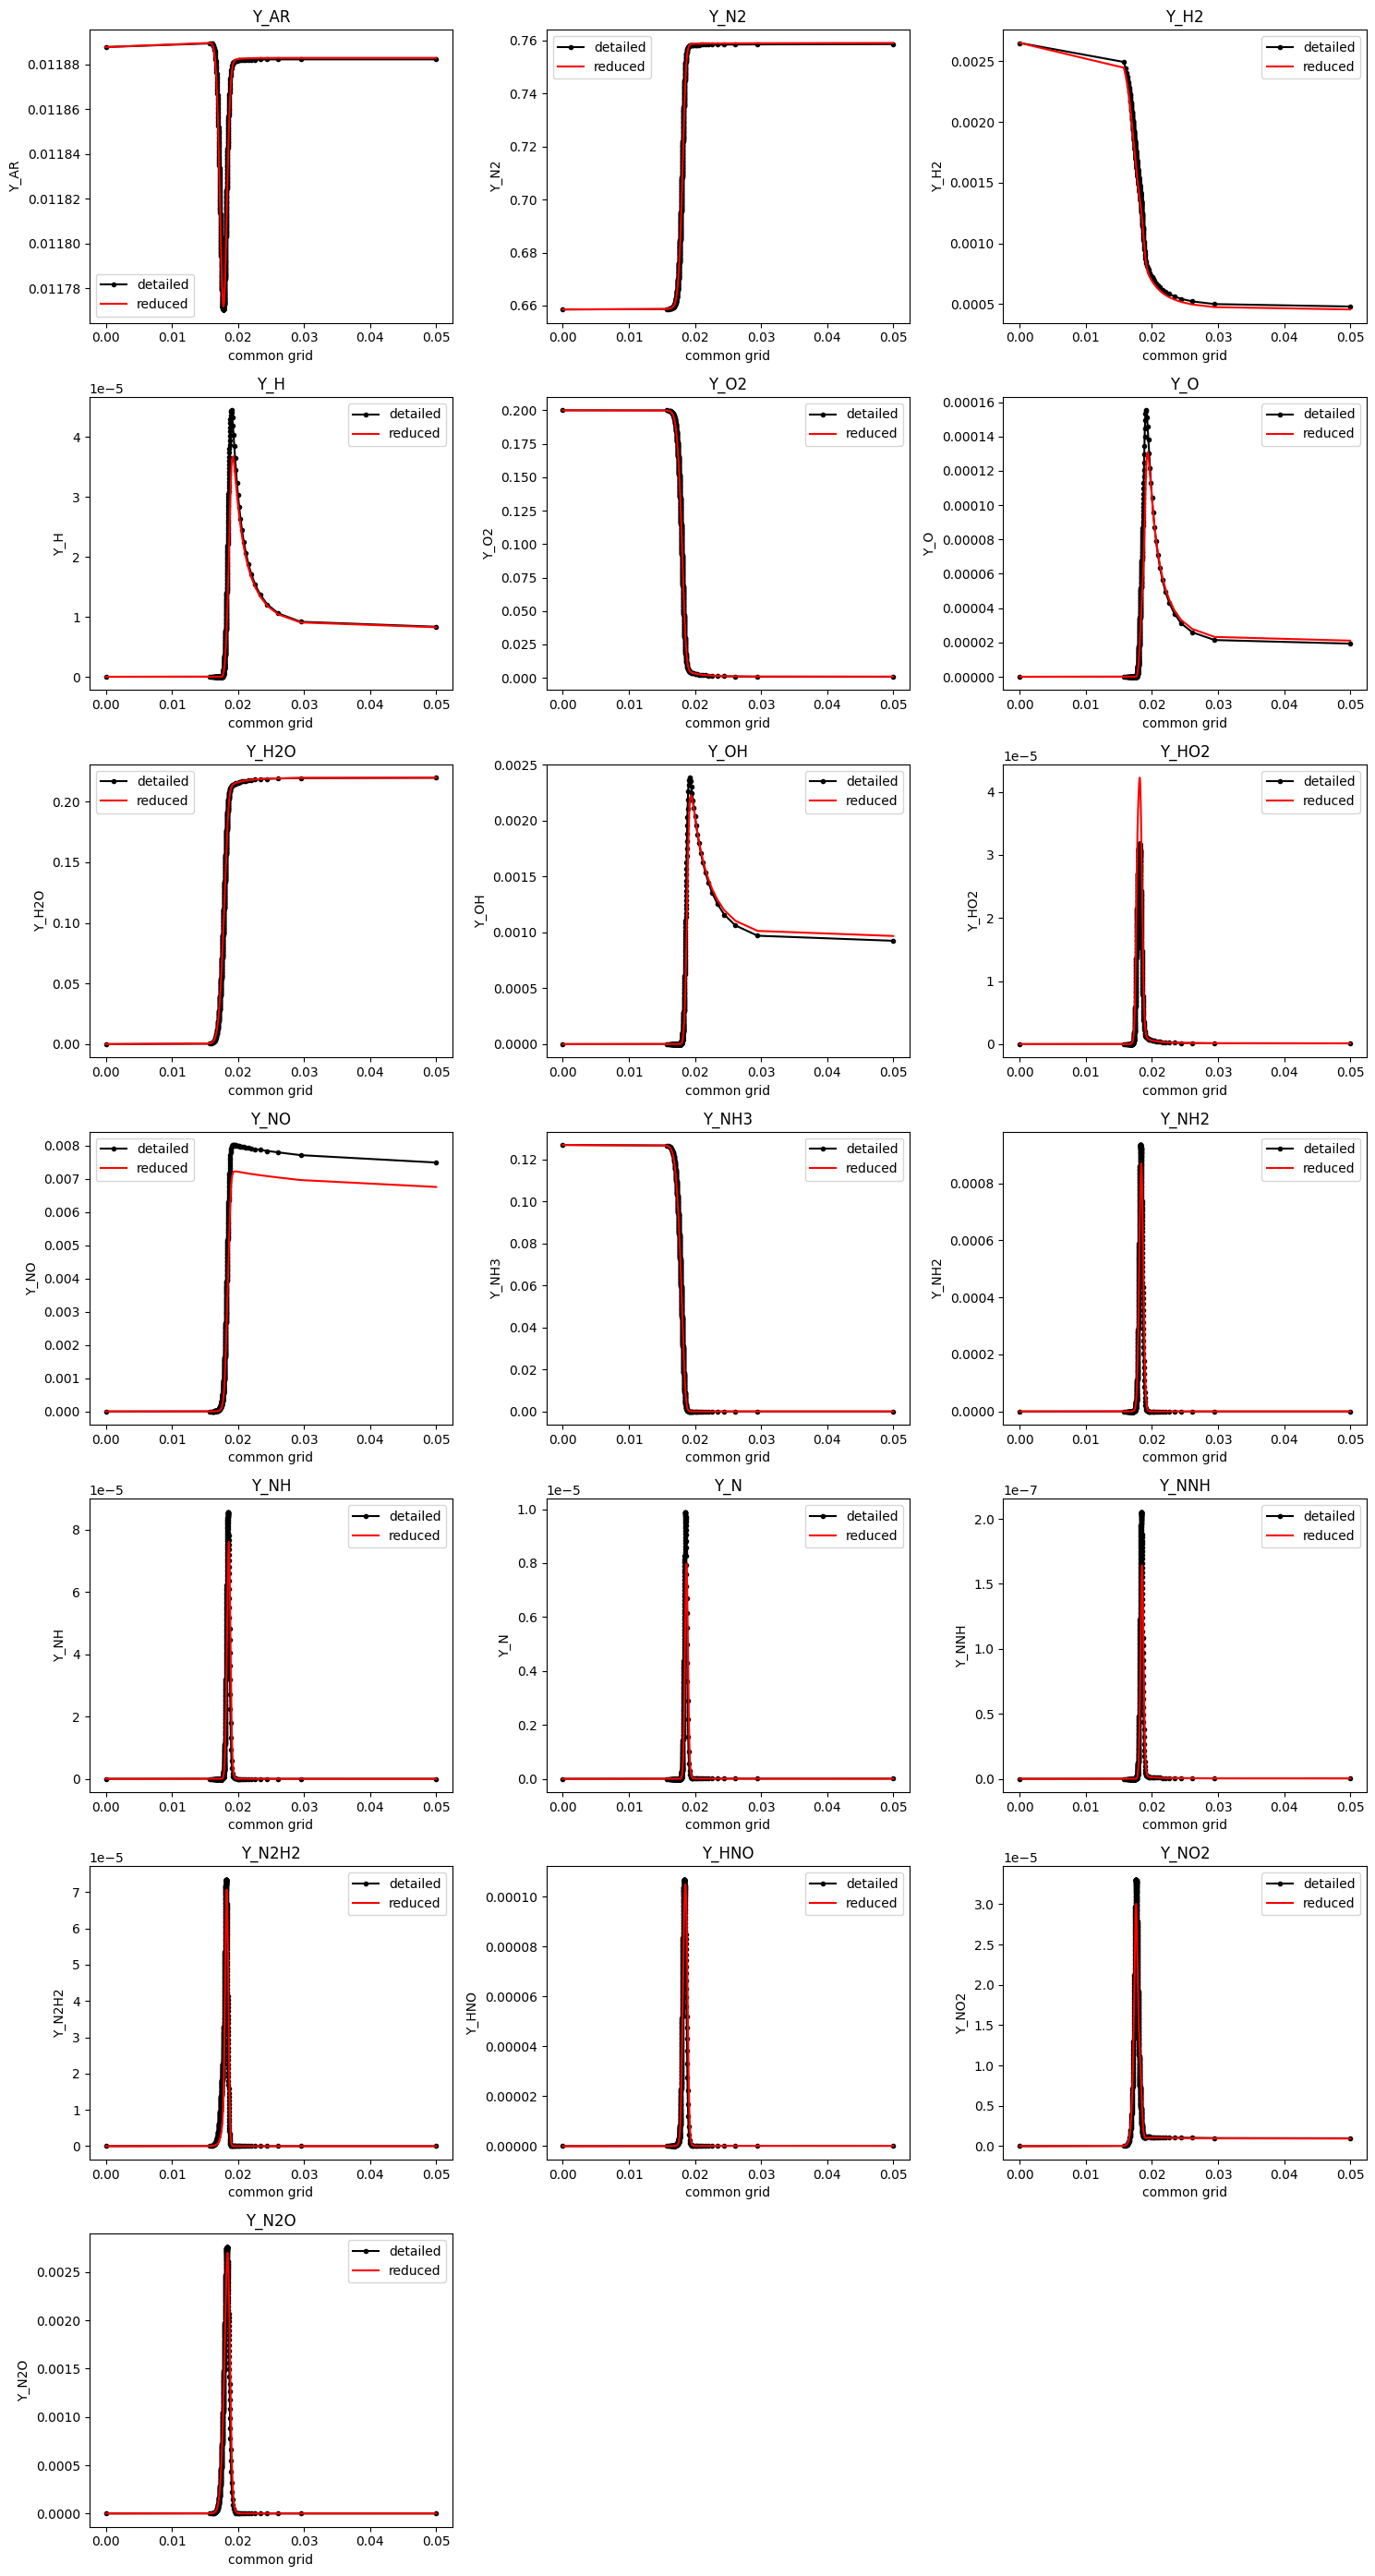

In [8]:
n_species = len(species)
n_cols = 3 # You can adjust number of columns depending on layout preference
n_rows = (n_species + n_cols - 1) // n_cols  # Ceiling division for rows

fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

for i, s in enumerate(species):
    row, col = divmod(i, n_cols)
    ax = axs[row][col]
    ax.plot(data_d["common_grid"], data_d[s], 'k.-', label='detailed')
    ax.plot(data_r["common_grid"], data_r[s], 'r', label='reduced')
    ax.set_xlabel("common grid")
    ax.set_ylabel(s)
    ax.legend()
    ax.set_title(s)

# Hide any unused subplots
for i in range(n_species, n_rows * n_cols):
    row, col = divmod(i, n_cols)
    fig.delaxes(axs[row][col])

plt.tight_layout()
plt.savefig("Species_1D_Processing.png")
plt.show()
